In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
path = r'C:\Users\User\Documents\World Happiness Data'

In [9]:
df_wh2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wh2019.csv'), index_col = False)

In [11]:
df_wh2019.head()

,Rank,Country,Score,Economy,Social support,Life_Expectancy,Freedom_of_choice,Perception_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298


In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_wh2019["Country"]=le.fit_transform(df_wh2019["Country"])

In [17]:
score = [kmeans[i].fit(df_wh2019).score(df_wh2019) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

[-632954.1806151026,
 -392203.09671819204,
 -250902.19860005495,
 -153214.96965264136,
 -122972.50348723367,
 -101411.82299245118,
 -95211.87429456423,
 -72290.63019505076,
 -65272.39354821111]

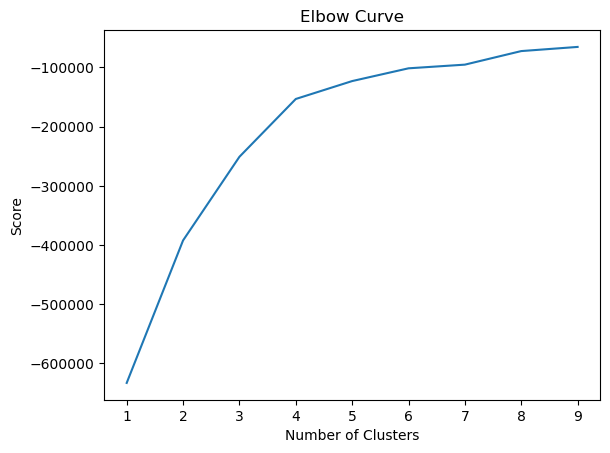

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_wh2019)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [25]:
df_wh2019['clusters'] = kmeans.fit_predict(df_wh2019)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
df_wh2019.head()

,Rank,Country,Score,Economy,Social support,Life_Expectancy,Freedom_of_choice,Perception_of_corruption,clusters
0,1,43,7.769,1.340,1.587,0.986,0.596,0.393,3
1,2,36,7.600,1.383,1.573,0.996,0.592,0.410,3
2,3,105,7.554,1.488,1.582,1.028,0.603,0.341,1
3,4,57,7.494,1.380,1.624,1.026,0.591,0.118,3
4,5,98,7.488,1.396,1.522,0.999,0.557,0.298,1


In [39]:
df_wh2019.to_csv(os.path.join(path, '02 Data', 'Prepared Data', '2019_cluster.csv'), index = False)

In [29]:
df_wh2019['clusters'].value_counts()

clusters
1    47
2    44
3    33
0    32
Name: count, dtype: int64

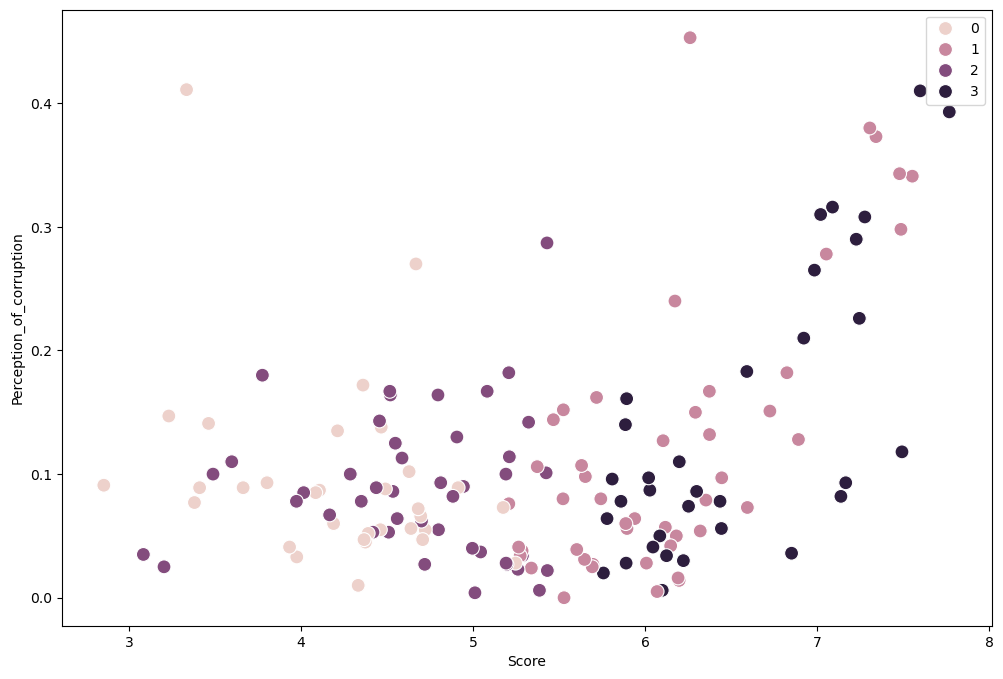

In [31]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_wh2019['Score'], y=df_wh2019['Perception_of_corruption'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Perception_of_corruption') # Label y-axis.
plt.show()

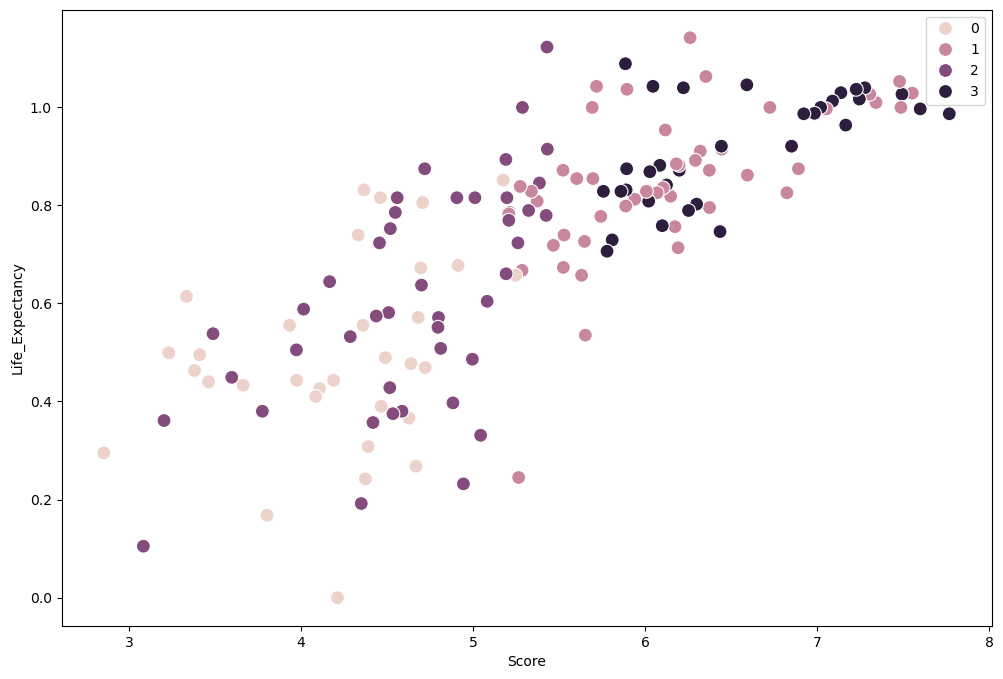

In [33]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_wh2019['Score'], y=df_wh2019['Life_Expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Score') 
plt.ylabel('Life_Expectancy') 
plt.show()

In [35]:
df_wh2019.loc[df_wh2019['clusters'] == 3, 'cluster'] = 'dark purple'
df_wh2019.loc[df_wh2019['clusters'] == 2, 'cluster'] = 'purple'
df_wh2019.loc[df_wh2019['clusters'] == 1, 'cluster'] = 'pink'
df_wh2019.loc[df_wh2019['clusters'] == 0, 'cluster'] = 'light pink'

In [37]:
df_wh2019.groupby('cluster').agg({'Score':['mean', 'median'], 
                         'Life_Expectancy':['mean', 'median'], 
                         'Perception_of_corruption':['mean', 'median'],
                          'Social support':['mean', 'median']})

Score         Life_Expectancy        Perception_of_corruption  \
                 mean  median            mean median                     mean   
cluster                                                                         
dark purple  6.530909  6.3000        0.917848  0.920                 0.138667   
light pink   4.217219  4.3630        0.495812  0.473                 0.095125   
pink         6.123021  6.1050        0.851170  0.854                 0.121319   
purple       4.664864  4.7575        0.613136  0.596                 0.089364   

                    Social support          
             median           mean  median  
cluster                                     
dark purple  0.0930       1.425697  1.4540  
light pink   0.0810       1.038437  1.1095  
pink         0.0800       1.374447  1.4300  
purple       0.0855       0.993136  1.0360